# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_regression
from sklearn.model_selection import permutation_test_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

pd.set_option("display.max_columns", 500)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

data_set = pd.read_csv("/Users/mkondeti/Desktop/Data Science Fundamentals/hw3_train.csv")
data_set = data_set.set_index('Id')

The above statements import libraries which will be used in this assignment. The training data which is a csv file is read as a dataframe using pandas dataframe. The dataframe is then indexed with "Id" column as index of the dataframe. 

In [113]:
df = data_set[["MSSubClass", "LotFrontage", "LotArea", "Neighborhood", "BldgType", "HouseStyle", "OverallQual", "YearBuilt", "YearRemodAdd", 
              "Exterior1st", "ExterQual", "BsmtQual", "KitchenQual", "Functional", "GarageArea", "SaleType", "SaleCondition",
              "LandContour", "TotalBsmtSF", "GrLivArea","LowQualFinSF","GarageCond","PoolArea", "GarageQual", "OpenPorchSF","WoodDeckSF", 
               "GarageCars", "TotRmsAbvGrd", "BedroomAbvGr", "FullBath", "YrSold", "SalePrice"]]

df.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,BsmtQual,KitchenQual,Functional,GarageArea,SaleType,SaleCondition,LandContour,TotalBsmtSF,GrLivArea,LowQualFinSF,GarageCond,PoolArea,GarageQual,OpenPorchSF,WoodDeckSF,GarageCars,TotRmsAbvGrd,BedroomAbvGr,FullBath,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,1Fam,2Story,7,2003,2003,VinylSd,Gd,Gd,Gd,Typ,548,WD,Normal,Lvl,856,1710,0,TA,0,TA,61,0,2,8,3,2,2008,208500
2,20,80.0,9600,Veenker,1Fam,1Story,6,1976,1976,MetalSd,TA,Gd,TA,Typ,460,WD,Normal,Lvl,1262,1262,0,TA,0,TA,0,298,2,6,3,2,2007,181500
3,60,68.0,11250,CollgCr,1Fam,2Story,7,2001,2002,VinylSd,Gd,Gd,Gd,Typ,608,WD,Normal,Lvl,920,1786,0,TA,0,TA,42,0,2,6,3,2,2008,223500
4,70,60.0,9550,Crawfor,1Fam,2Story,7,1915,1970,Wd Sdng,TA,TA,Gd,Typ,642,WD,Abnorml,Lvl,756,1717,0,TA,0,TA,35,0,3,7,3,1,2006,140000
5,60,84.0,14260,NoRidge,1Fam,2Story,8,2000,2000,VinylSd,Gd,Gd,Gd,Typ,836,WD,Normal,Lvl,1145,2198,0,TA,0,TA,84,192,3,9,4,2,2008,250000


The above statement selects multiple columns from "data_set" dataframe and points the resultant dataframe to the df variable. The columns are selected for the first two questions.

Note : The above data is a subset of the actual complete dataframe.

In [114]:
df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
ExterQual          0
BsmtQual          37
KitchenQual        0
Functional         0
GarageArea         0
SaleType           0
SaleCondition      0
LandContour        0
TotalBsmtSF        0
GrLivArea          0
LowQualFinSF       0
GarageCond        81
PoolArea           0
GarageQual        81
OpenPorchSF        0
WoodDeckSF         0
GarageCars         0
TotRmsAbvGrd       0
BedroomAbvGr       0
FullBath           0
YrSold             0
SalePrice          0
dtype: int64

In [115]:
df.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
Neighborhood      object
BldgType          object
HouseStyle        object
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
ExterQual         object
BsmtQual          object
KitchenQual       object
Functional        object
GarageArea         int64
SaleType          object
SaleCondition     object
LandContour       object
TotalBsmtSF        int64
GrLivArea          int64
LowQualFinSF       int64
GarageCond        object
PoolArea           int64
GarageQual        object
OpenPorchSF        int64
WoodDeckSF         int64
GarageCars         int64
TotRmsAbvGrd       int64
BedroomAbvGr       int64
FullBath           int64
YrSold             int64
SalePrice          int64
dtype: object

The above two statements indicate the total of null values and data types of columns in the selected dataframe(df)

## Part 1 - Pairwise Correlations

In [116]:
def function(input):
    if (input == 'Ex'):
        return 10
    elif (input == 'Gd'):
        return 8
    elif (input == 'TA'):
        return 6
    elif (input == 'Fa'):
        return 4
    elif (input == 'Po' ):
        return 2
    else:
        return 0

In [117]:
df['TotalSqft'] = TotalSqft = data_set["1stFlrSF"]+data_set["TotalBsmtSF"]+data_set["2ndFlrSF"]
df['KitchenQualIndex'] =KitchenQualIndex = data_set['KitchenQual'].apply(function)
df['BsmtQualIndex']=BsmtQualIndex=data_set['BsmtQual'].apply(function)

In [118]:
df[['KitchenQualIndex', 'BsmtQualIndex', 'TotalSqft']].head()

,KitchenQualIndex,BsmtQualIndex,TotalSqft
Id,,,
1,8,8,2566
2,6,8,2524
3,8,8,2706
4,8,6,2473
5,8,8,3343


The above statements compute totalsqft as summation of 1stFlrSF, TotalBsmtSF and 2nd FlrSF
Function converts categorical feature 'Bsmtqal' into discrete values. The values are mapped to values based on the relative importance.

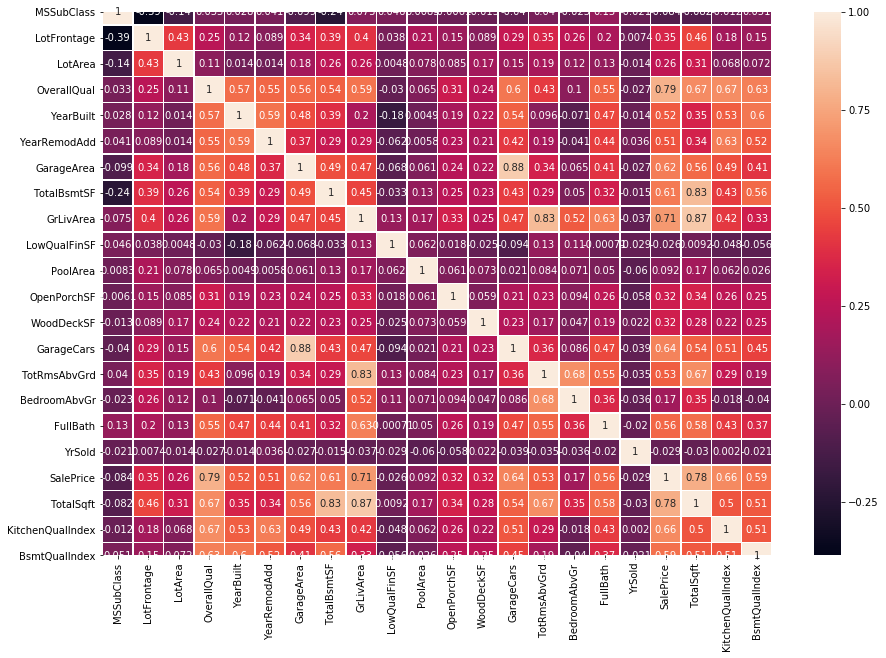

In [119]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, linewidth=0.5)

From the above heatmap, we can see the corelarions between various columns of the dataframe.

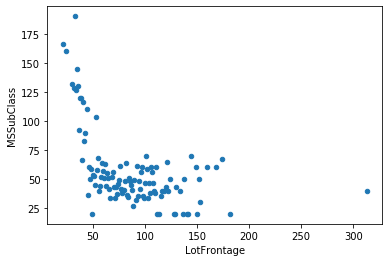

In [120]:
group1 = df.groupby('LotFrontage').MSSubClass.mean()
group1 = group1.to_frame()
group1.reset_index(inplace=True)
group1.plot(kind = 'scatter', x = "LotFrontage", y="MSSubClass")

This plot between LotFrontage and BsmtQualIndex tells that both variables have negative corelation between them.
Even in the heatmap, both these variables have a corelation of -0.39
LotFrontage and BsmtQualIndex have most negative corelation.

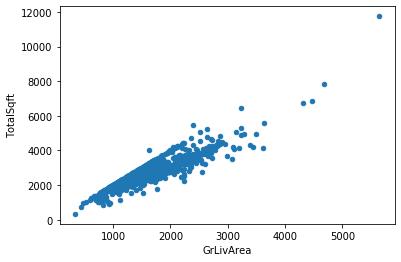

In [121]:
group2 = df.groupby('GrLivArea').TotalSqft.mean()
group2 = group2.to_frame()
group2.reset_index(inplace=True)
group2.plot(kind = 'scatter', x = "GrLivArea", y="TotalSqft")

The above scatter plot between "GrLivArea" and "TotalSqft" shows positive corelation
This is also evident from the heatmap which tells us that a corelation of 0.87 is between features "GrLivArea" and "TotalSqft".
So, corelation between "GrLivArea" and "TotalSqft" is the maximum corelation.

Discuss most positive and negative correlations.

## Part 2 - Informative Plots

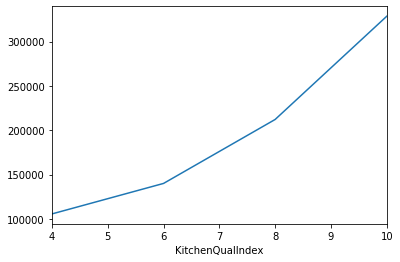

In [122]:
group = df.groupby('KitchenQualIndex')['SalePrice'].mean()
group.plot(kind = 'line')

The above plot is a line graph between KitchenQualIndex and SalePrice.
We can see that both of these features have a positive corelation and we can infer that KitchenQuality is an important factor in determining the price of a given proeprty.
From this, we can also infer that Women have crucial role in purchase of a house since they care a lot about Kitchen.


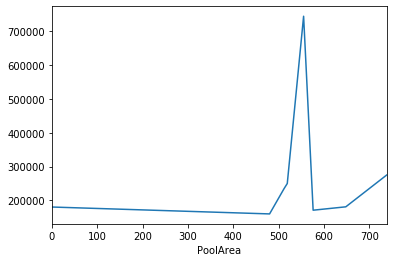

In [123]:
group = df.groupby('PoolArea')['SalePrice'].mean()
group.plot(kind = 'line')

This line graph between "PoolArea" and "SalePrice" demonstrates that PoolArea doesn't influence the SalePrice and this makes first line graph even more meaningful.

What interesting properties does Plot 1 reveal?

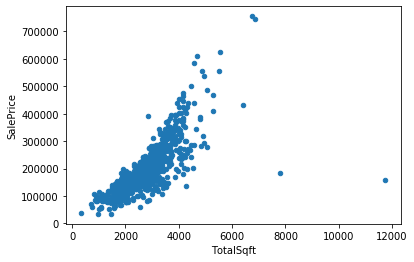

In [124]:
group2 = df.groupby('TotalSqft').SalePrice.mean()
group2 = group2.to_frame()
group2.reset_index(inplace=True)
group2.plot(kind = 'scatter', x = "TotalSqft", y="SalePrice")

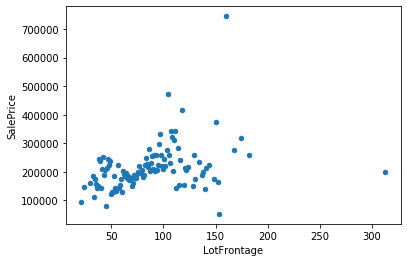

In [125]:
group3 = df.groupby('LotFrontage').SalePrice.mean()
group3 = group3.to_frame()
group3.reset_index(inplace=True)
group3.plot(kind = 'scatter', x = "LotFrontage", y="SalePrice")

The Scatter plot is between "TotalSqft" and "SalePrice"
As we can see in the figure, as TotalSqft increases, the SalePrice increases which is natural for any house sale.
But, with second figure we can infer that as LotFrontage value increases, the SalePrice value is not increasing.
So, people are more inclined to buy a house which has more living area and less inclined to spend more money on LotFrontage. In a way, people are more inclined to buy flats in apartments than buy independent houses.

What interesting properties does Plot 2 reveal?

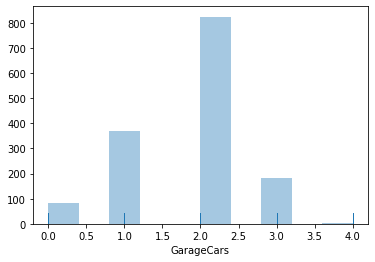

In [126]:
group3 = df['GarageCars']


sns.distplot(group3, bins=10, kde=False, rug=True);

From the bar diagram, we can see that more number of families use two cars per house and very few pople use three cars. We can find almost zero families using four cars.
Hence, two cars per house is the norm according to the dataset.

What interesting properties does Plot 3 reveal?

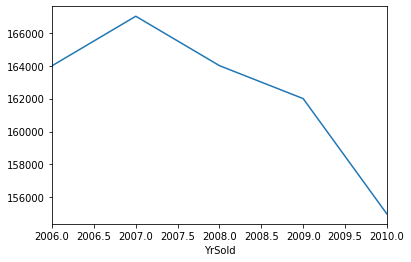

In [127]:
group = df.groupby('YrSold')['SalePrice'].median()
group.plot(kind = 'line')


The above scatter plot is between 'YrSold' and 'SalePrice'.
As we can see from the graph, the selling price od houses were highest at 2007 i.e before recession. 
After recession has it, mainly housing market was affected badly. The selling price of houses have gone down when compared with pre recession time.
This trend is evident from the line plot.

What interesting properties does Plot 4 reveal?

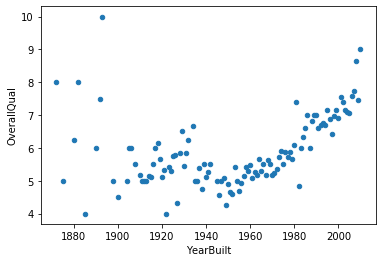

In [128]:
group3 = df.groupby('YearBuilt').OverallQual.mean()
group3 = group3.to_frame()
group3.reset_index(inplace=True)
group3.plot(kind = 'scatter', x = "YearBuilt", y="OverallQual")


The above scatter plot is between "YearBuilt" and "OverallQual".
As we can see, after 1960's the overallQual of the house kep't increasing.
This can be due to the advancements in building technology and better standard of living of people which allowed people to afford better quality of houses.

What interesting properties does Plot 5 reveal?

## Part 3 - Handcrafted Scoring Function

In [129]:
df2 = data_set[["LotFrontage", "OverallQual", "YearRemodAdd", 
               "ExterQual", "BsmtQual", "Functional", "GarageArea", "SaleType",
              "LandContour", "TotalBsmtSF", "GrLivArea", 'LandSlope',"BsmtFinSF2" 
               ]]
df2.head(10)

,LotFrontage,OverallQual,YearRemodAdd,ExterQual,BsmtQual,Functional,GarageArea,SaleType,LandContour,TotalBsmtSF,GrLivArea,LandSlope,BsmtFinSF2
Id,,,,,,,,,,,,,
1,65.0,7,2003,Gd,Gd,Typ,548,WD,Lvl,856,1710,Gtl,0
2,80.0,6,1976,TA,Gd,Typ,460,WD,Lvl,1262,1262,Gtl,0
3,68.0,7,2002,Gd,Gd,Typ,608,WD,Lvl,920,1786,Gtl,0
4,60.0,7,1970,TA,TA,Typ,642,WD,Lvl,756,1717,Gtl,0
5,84.0,8,2000,Gd,Gd,Typ,836,WD,Lvl,1145,2198,Gtl,0
6,85.0,5,1995,TA,Gd,Typ,480,WD,Lvl,796,1362,Gtl,0
7,75.0,8,2005,Gd,Ex,Typ,636,WD,Lvl,1686,1694,Gtl,0
8,NaN,7,1973,TA,Gd,Typ,484,WD,Lvl,1107,2090,Gtl,32
9,51.0,7,1950,TA,TA,Min1,468,WD,Lvl,952,1774,Gtl,0


In the above statements, I have selected features which are important while buying a house and saved that dataframe into a new variable called df2

In [130]:
#functions to be applied for categorical values and for scaling numerical values
def func_lot(input):
    if (input <= 313 and input >= 80):
        return 10
    if (input < 80 and input >= 69):
        return 7.5
    if (input < 69 and input >= 59):
        return 5
    if (input < 59):
        return 2.5
    
def func_street(input):
    if (input == 'Pave'):
        return 10
    if (input == 'Gravel'):
        return 0
    
def func_year_remod(input):
    if (input <= 2010 and input >= 2004):
        return 10
    if (input < 2004 and input >= 1994):
        return 7.5
    if (input < 1994 and input >= 1967):
        return 5
    if (input < 1967 ):
        return 2.5

def func_functional(input):
    if (input == "Typ"):
        return 10
    elif (input == 'Min1'):
        return 8
    elif (input == 'Min2'):
        return 6
    elif (input == 'Mod'):
        return 4
    elif (input == 'Maj1' ):
        return 2
    elif (input == 'Maj2' ):
        return 0
    elif (input == 'Sev' ):
        return -2
    elif (input == 'Sal' ):
        return -4
    
def func_garage(input):
    if (input <= 1418 and input >= 576):
        return 10
    if (input < 576 and input >= 480):
        return 7.5
    if (input < 480 and input >= 334):
        return 5
    if (input < 334 ):
        return 2.5
    

def func_SaleType(input):
    if (input == 'WD'):
        return 10
    elif (input == 'CWD'):
        return 10
    elif (input == 'VWD'):
        return 9
    elif (input == 'New'):
        return 8
    elif (input == 'COD'):
        return 7
    elif (input == 'Con' ):
        return 6
    elif (input == 'ConLw' ):
        return 5
    elif (input == 'ConLI' ):
        return 4
    elif (input == 'ConLD' ):
        return 3
    elif (input == 'Oth' ):
        return 2

def func_LandContour(input):
    if (input == 'Lvl'):
        return 10
    elif (input == 'Bnk'):
        return 7.5
    elif (input == 'HLS'):
        return 5
    elif (input == 'Low'):
        return 2.5
    
def func_TotalBsmtSF(input):
    if (input <= 6110 and input >= 1298.25):
        return 10
    if (input < 1298.25 and input >= 991.5):
        return 7.5
    if (input < 991.5 and input >= 795.75):
        return 5
    if (input < 795.75 ):
        return 2.5

def func_GrLivArea(input):
    if (input <= 5642 and input >= 1776.75):
        return 10
    if (input < 1776.75 and input >= 1464):
        return 7.5
    if (input < 1464 and input >= 1129.5):
        return 5
    if (input < 1129.5 and input >= 334 ):
        return 2.5    

        
def func_LandSlope(input):
    if (input == 'Gtl'):
        return 10
    elif (input == 'Mod'):
        return 5
    elif (input == 'Sev'):
        return 0

def func_TotalSqft(input):
    if (input <= 11752 and input >= 3004):
        return 10
    if (input < 3004 and input >= 2474):
        return 7.5
    if (input < 2474 and input >= 2009.5):
        return 5
    if (input < 2009.5 and input >= 334 ):
        return 2.5
    
df2['TotalSqft'] = data_set["1stFlrSF"]+data_set["TotalBsmtSF"]+data_set["2ndFlrSF"]
df2['KitchenQualIndex'] = data_set['KitchenQual'].apply(function)
df2['BsmtQualIndex']=BsmtQualIndex=data_set['BsmtQual'].apply(function)


df2['LotFrontage'] = df2['LotFrontage'].apply(func_lot)
df2['YearRemodAdd'] = df2['YearRemodAdd'].apply(func_year_remod)
df2['ExterQual'] = df2['ExterQual'].apply(function)
df2['BsmtQual'] = df2['BsmtQual'].apply(function)
df2['Functional'] = df2['Functional'].apply(func_functional)
df2['GarageArea'] = df2['GarageArea'].apply(func_garage)
df2['SaleType'] = df2['SaleType'].apply(func_SaleType)
df2['LandContour'] = df2['LandContour'].apply(func_LandContour)
df2['TotalBsmtSF'] = df2['TotalBsmtSF'].apply(func_TotalBsmtSF)
df2['GrLivArea'] = df2['GrLivArea'].apply(func_GrLivArea)
df2['LandSlope'] = df2['LandSlope'].apply(func_LandSlope)
df2['TotalSqft'] = df2['TotalSqft'].apply(func_TotalSqft)
df2.fillna(0, inplace = True)

df2.head(10)

,LotFrontage,OverallQual,YearRemodAdd,ExterQual,BsmtQual,Functional,GarageArea,SaleType,LandContour,TotalBsmtSF,GrLivArea,LandSlope,BsmtFinSF2,TotalSqft,KitchenQualIndex,BsmtQualIndex
Id,,,,,,,,,,,,,,,,
1,5.0,7,7.5,8,8,10,7.5,10,10.0,5.0,7.5,10,0,7.5,8,8
2,10.0,6,5.0,6,8,10,5.0,10,10.0,7.5,5.0,10,0,7.5,6,8
3,5.0,7,7.5,8,8,10,10.0,10,10.0,5.0,10.0,10,0,7.5,8,8
4,5.0,7,5.0,6,6,10,10.0,10,10.0,2.5,7.5,10,0,5.0,8,6
5,10.0,8,7.5,8,8,10,10.0,10,10.0,7.5,10.0,10,0,10.0,8,8
6,10.0,5,7.5,6,8,10,7.5,10,10.0,5.0,5.0,10,0,5.0,6,8
7,7.5,8,10.0,8,10,10,10.0,10,10.0,10.0,7.5,10,0,10.0,8,10
8,0.0,7,5.0,6,8,10,7.5,10,10.0,7.5,10.0,10,32,10.0,6,8
9,2.5,7,2.5,6,6,8,5.0,10,10.0,5.0,7.5,10,0,7.5,6,6


In the above code contains the functions which are applied on the 'df2' dataframe.
For Continous variables, scaling is done based on the relative percentile of the value
For Categorical values, features are scaled into integers values from 0 - 10
After functions are defined, then the relative columns are apllied by the respective function and the resulatant dataframe first 10 values are printed above. 

In [131]:
#Handcrafted Scoring function
df2["rating"] = (3*df2["LotFrontage"] + 10*df2["OverallQual"] + 4*df2["YearRemodAdd"]+ 
              4*df2["ExterQual"] +  4*df2["BsmtQual"] + 8*df2["Functional"] +  4*df2["GarageArea"] + 5*df2["SaleType"]
                  + 5*df2["LandContour"] +  4*df2["TotalBsmtSF"] +  6*df2["GrLivArea"] +  5*df2['LandSlope']+ 
                 10*df2['TotalSqft']+8*df2['KitchenQualIndex']+6*df2['BsmtQualIndex'])


This is the main code for handpicked function.
Here variuous features are multipled with scalar values from 0 - 10 and the sum of respective multiples is stored in a new column named as 'rating' 

In [132]:
#Top 10 most desirable houses
#dataframe is sorted in descending order based on values in 'value' column of df2.
df2.sort_values(by = ['rating'], ascending = False)[:10]



,LotFrontage,OverallQual,YearRemodAdd,ExterQual,BsmtQual,Functional,GarageArea,SaleType,LandContour,TotalBsmtSF,GrLivArea,LandSlope,BsmtFinSF2,TotalSqft,KitchenQualIndex,BsmtQualIndex,rating
Id,,,,,,,,,,,,,,,,,
441,10.0,10,10.0,10,10,10,10.0,10,10.0,10.0,10.0,10,539,10.0,10,10,860.0
516,10.0,10,10.0,10,10,10,10.0,8,10.0,10.0,10.0,10,0,10.0,10,10,850.0
1443,10.0,10,10.0,10,10,10,10.0,10,10.0,7.5,10.0,10,0,10.0,10,10,850.0
692,10.0,10,7.5,10,10,10,10.0,10,10.0,10.0,10.0,10,0,10.0,10,10,850.0
933,10.0,9,10.0,10,10,10,10.0,10,10.0,10.0,10.0,10,0,10.0,10,10,850.0
390,10.0,10,10.0,10,10,10,10.0,8,10.0,10.0,10.0,10,0,10.0,10,10,850.0
826,10.0,10,10.0,10,10,10,10.0,8,10.0,10.0,10.0,10,0,10.0,10,10,850.0
541,10.0,9,10.0,10,10,10,10.0,10,10.0,10.0,10.0,10,0,10.0,10,10,850.0
225,10.0,10,7.5,10,10,10,10.0,10,10.0,10.0,10.0,10,0,10.0,10,10,850.0


In [133]:
#ten least desirable houses
#dataframe is sorted in ascending order based on values in 'value' column of df2.
df2.sort_values(by = ['rating'], ascending = True)[:10]

,LotFrontage,OverallQual,YearRemodAdd,ExterQual,BsmtQual,Functional,GarageArea,SaleType,LandContour,TotalBsmtSF,GrLivArea,LandSlope,BsmtFinSF2,TotalSqft,KitchenQualIndex,BsmtQualIndex,rating
Id,,,,,,,,,,,,,,,,,
376,0.0,1,2.5,4,4,2,2.5,10,2.5,2.5,2.5,0,0,2.5,4,4,246.5
534,2.5,1,2.5,4,0,10,2.5,10,2.5,2.5,2.5,5,0,2.5,4,0,303.0
637,2.5,2,2.5,4,6,2,2.5,5,10.0,2.5,2.5,10,0,2.5,4,6,346.5
706,7.5,4,2.5,4,0,4,2.5,10,10.0,2.5,2.5,10,0,2.5,4,0,362.5
750,2.5,4,2.5,6,0,4,2.5,10,10.0,2.5,7.5,10,0,2.5,6,0,401.5
1322,0.0,3,2.5,6,0,10,2.5,10,10.0,2.5,2.5,10,0,2.5,6,0,402.0
1046,0.0,3,2.5,6,0,6,5.0,10,10.0,2.5,7.5,10,0,2.5,6,0,410.0
343,0.0,3,2.5,6,0,10,5.0,10,10.0,2.5,2.5,10,0,2.5,6,0,412.0
1036,0.0,4,2.5,6,0,10,2.5,10,10.0,2.5,2.5,10,0,2.5,6,0,412.0


My scoring function takes important features that are influential in determining the sale price of house.
Then, it multiples each feature based on the relative influences it has in SalePrice.
The summation of all the products is stored in a column called as "result". 

## Part 4 - Pairwise Distance Function

In [134]:
list1 = ["Neighborhood", "BldgType", "OverallQual", "YearBuilt", "YearRemodAdd", 
               "BsmtQual", "KitchenQual", "Functional", "GarageArea", "SaleType", "SaleCondition",
               "TotalBsmtSF", "GrLivArea","LowQualFinSF","GarageQual", 
               "GarageCars", "TotRmsAbvGrd", "FullBath","YrSold"]

cont_list2 = ["MSSubClass", "LotFrontage", "LotArea","OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","BsmtUnfSF",
             "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF","GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath",
            "MasVnrArea", "BsmtFinSF1", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd","Fireplaces", "GarageYrBlt", 
            "GarageCars", "GarageArea", "WoodDeckSF","OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
             "MoSold", "YrSold"]


category_list = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood",
                "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", 
                "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", 
                "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]

df = data_set

df[cont_list2].fillna(df[cont_list2].mean(), inplace = True)
df[category_list].fillna(df[category_list].mode(), inplace = True)
df.fillna(0, inplace = True)

Here, I declared two lists for categorical and continous values.
Then, NaN in the dataframe are replaced with mean and mode for continous and categorical fields respectively.

In [135]:
train_data_set = pd.read_csv("/Users/mkondeti/Desktop/Data Science Fundamentals/hw3_train.csv")
test_data_set = pd.read_csv("/Users/mkondeti/Desktop/Data Science Fundamentals/test.csv")

submit = test_data_set['Id']
sale_price = train_data_set["SalePrice"]

train_data_set = train_data_set.drop("SalePrice", axis = 1)
submit = submit.to_frame()
TotalData = pd.merge(train_data_set, test_data_set, how = 'outer')

TotalData1 = TotalData.set_index('Id')
TotalData1[cont_list2].fillna(TotalData1[cont_list2].median(), inplace = True)
TotalData1[category_list].fillna(TotalData1[category_list].mode(), inplace = True)
TotalData1.fillna(0, inplace = True)

#one Hot Encoding
TotalData1 = TotalData1[list1]

TotalData1 = pd.get_dummies(TotalData1)

one_hot_df = TotalData1[0:train_data_set.shape[0]]
one_hot_df2 = TotalData1[train_data_set.shape[0] :]

In [136]:
from sklearn.metrics.pairwise import euclidean_distances
k = euclidean_distances(one_hot_df, one_hot_df)

## Part 5 - Clustering

In [137]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(one_hot_df)
one_hot_df['cluster'] = kmeans.labels_

groupby = one_hot_df.groupby('cluster')

groupby.describe()

OverallQual                                                   \
              count      mean       std  min   25%   50%   75%   max   
cluster                                                                
0             580.0  5.134483  0.956308  1.0   5.0   5.0   6.0   8.0   
1             143.0  7.468531  1.209145  5.0   7.0   8.0   8.0  10.0   
2             394.0  6.241117  1.016522  3.0   6.0   6.0   7.0  10.0   
3             338.0  6.958580  1.239101  4.0   6.0   7.0   8.0  10.0   
4               5.0  9.600000  0.894427  8.0  10.0  10.0  10.0  10.0   

        YearBuilt                                                           \
            count         mean        std     min      25%     50%     75%   
cluster                                                                      
0           580.0  1959.201724  24.895686  1875.0  1945.75  1961.0  1973.0   
1           143.0  1977.545455  34.545689  1880.0  1966.00  1994.0  2003.0   
2           394.0  1970.005076  34.189860  1872.0  1941.00  1978.0  2000.0   
3           338.0  1990.372781  19.254737  1923.0  1975.00  2001.0  2006.0   
4             5.0  1999.400000   7.536577  1992.0  1994.00  1996.0  2007.0   

                YearRemodAdd                                                   \
            max        count         mean        std     min      25%     50%   
cluster                                                                         
0        2009.0        580.0  1975.777586  20.770159  1950.0  1956.00  1971.5   
1        2009.0        143.0  1994.832168  14.135155  1950.0  1992.50  1998.0   
2        2009.0        394.0  1986.225888  20.127892  1950.0  1972.00  1995.0   
3        2010.0        338.0  1994.434911  16.283201  1950.0  1986.25  2002.0   
4        2008.0          5.0  2000.000000   7.382412  1993.0  1995.00  1996.0   

                        GarageArea                                        \
            75%     max      count        mean         std    min    25%   
cluster                                                                    
0        1998.0  2010.0      580.0  363.800000  186.445067    0.0  264.0   
1        2005.0  2010.0      143.0  659.174825  204.559276    0.0  546.0   
2        2003.0  2010.0      394.0  450.652284  164.736874    0.0  381.0   
3        2006.0  2010.0      338.0  601.286982  180.801407    0.0  484.0   
4        2008.0  2008.0        5.0  898.600000  318.621719  546.0  813.0   

                              TotalBsmtSF                                    \
           50%    75%     max       count         mean          std     min   
cluster                                                                       
0        352.0  484.0  1248.0       580.0   849.820690   274.323861     0.0   
1        667.0  820.0  1166.0       143.0  1324.041958   363.918925   588.0   
2        453.0  540.0  1053.0       394.0   815.017766   218.734906     0.0   
3        566.0  711.0  1390.0       338.0  1547.952663   254.431823  1127.0   
4        832.0  884.0  1418.0         5.0  3457.600000  1529.551176  2396.0   

                                         GrLivArea                           \
             25%     50%     75%     max     count         mean         std   
cluster                                                                       
0         690.50   882.0  1051.0  1276.0     580.0  1054.929310  186.091896   
1        1106.00  1252.0  1470.0  2633.0     143.0  2511.440559  336.385544   
2         732.75   832.0   947.0  1208.0     394.0  1730.253807  219.907317   
3        1368.00  1499.5  1683.5  3206.0     338.0  1590.307692  219.628186   
4        2444.00  3138.0  3200.0  6110.0       5.0  4467.600000  863.467892   

                                                 LowQualFinSF             \
            min     25%     50%      75%     max        count       mean   
cluster                                                                    
0         334.0   912.0  1062.5  1200.75  1406.0      

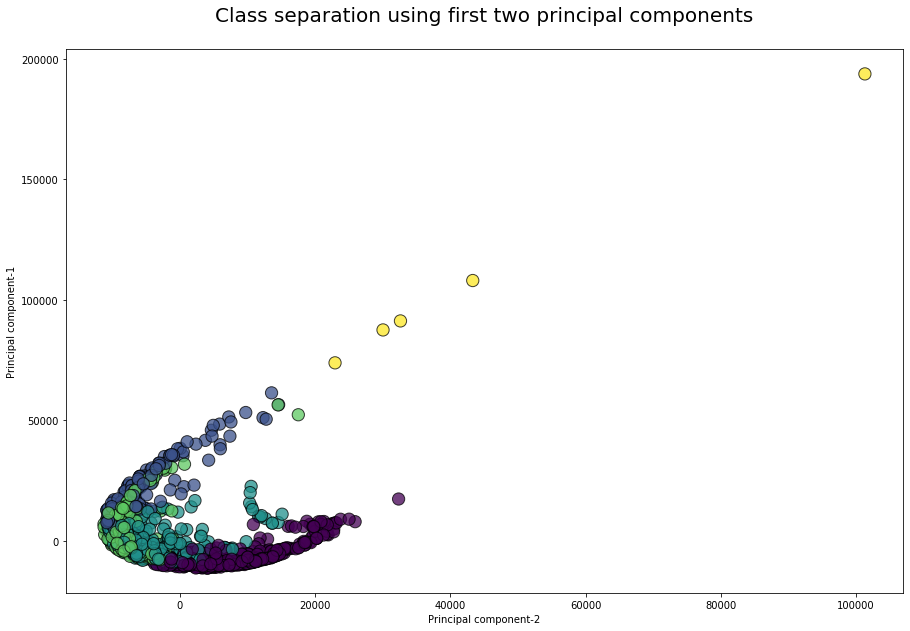

In [138]:

cluster = PCA(n_components=4)


k_cluster = cluster.fit_transform(k)
k_cluster = pd.DataFrame(data=k_cluster)
plt.figure(figsize=(15,10))
plt.scatter(k_cluster[1],k_cluster[0], c= kmeans.labels_.astype(float),edgecolors='k',alpha=0.75,s=150)

plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-2",fontsize=10)
plt.ylabel("Principal component-1",fontsize=10)

plt.show()


The above graph gives clusters of one_hot_encoded data which was fed by dataframe.

## Part 6 - Linear Regression

In [139]:
list1 = ["Neighborhood", "BldgType", "OverallQual", "YearBuilt", "YearRemodAdd", 
               "BsmtQual", "KitchenQual", "Functional", "GarageArea", "SaleType", "SaleCondition",
               "TotalBsmtSF", "GrLivArea","LowQualFinSF","GarageQual", 
               "GarageCars", "TotRmsAbvGrd", "FullBath","YrSold"]

list2 = ["LotFrontage", "OverallQual", "YearRemodAdd", 
               "ExterQual", "BsmtQual", "Functional", "GarageArea", "SaleType",
              "LandContour", "TotalBsmtSF", "GrLivArea", 'LandSlope', "TotRmsAbvGrd", "Neighborhood", "BldgType"
               ]

cont_list2 = ["MSSubClass", "LotFrontage", "LotArea","OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","BsmtUnfSF",
             "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF","GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath",
            "MasVnrArea", "BsmtFinSF1", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd","Fireplaces", "GarageYrBlt", 
            "GarageCars", "GarageArea", "WoodDeckSF","OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
             "MoSold", "YrSold"]


category_list = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood",
                "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", 
                "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", 
                "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]

I've defined three lists in the above line. 
These lists will be used on the train and test datasets. list2 will used for feature selection on one_hot_encoded data frame. cont_list2 will be used to filter continous features from the given dataframe. category_listwill be used to filter out categorical features from given data frame.

In [140]:
train_data_set = pd.read_csv("/Users/mkondeti/Desktop/Data Science Fundamentals/hw3_train.csv")
test_data_set = pd.read_csv("/Users/mkondeti/Desktop/Data Science Fundamentals/test.csv")

submit = test_data_set['Id']
sale_price = train_data_set["SalePrice"]

train_data_set = train_data_set.drop("SalePrice", axis = 1)
submit = submit.to_frame()
TotalData = pd.merge(train_data_set, test_data_set, how = 'outer')

Initially I  imported train data and test data from local machine and then extracting "SalePrice" column from data frame. Later, I've dropped the 'SalePrice' column since  'SalePrice' is not required to be in the train data data frame. Lastly, I've merged train data and test data using outer merge command.
The resultant frame is stored using TotalData variable. 

In [141]:
TotalData1 = TotalData.set_index('Id')
TotalData1[cont_list2].fillna(TotalData1[cont_list2].median(), inplace = True)
TotalData1[category_list].fillna(TotalData1[category_list].mode(), inplace = True)
TotalData1.fillna(0, inplace = True)


TotalData1 = TotalData1[list1]
#one Hot Encoding
TotalData1 = pd.get_dummies(TotalData1)

one_hot_df = TotalData1[0:train_data_set.shape[0]]
one_hot_df2 = TotalData1[train_data_set.shape[0] :]

Here, I've used "cont_list2" and "category_list" to fill NaN values with median and mode respectively in the dataframe. Later, I've filled remaining NaN values with zero's. Then, we filtered the TotalData using "list1".
get_dummies does one hot encoding of the data frame and then I've separated the train data and test data into two different variables.

In [142]:
model = LinearRegression()
model.fit(one_hot_df, sale_price)

list2 = model.coef_
max = list2.max()
max2 = 2
for i in range(len(list2)):
    if list2[i] == max:
        max2 = i
        
print(one_hot_df.columns[76])

submit['SalePrice'] = model.predict(one_hot_df2)
submit.to_csv( "/Users/mkondeti/Desktop/Data Science Fundamentals/submit.csv" , index = False)

GarageQual_Ex


In [143]:
list2 = model.coef_
max = list2.max()
max2 = 2
for i in range(len(list2)):
    if list2[i] == max:
        max2 = i
        
print(one_hot_df.columns[76] + ' is the most important feature.')

GarageQual_Ex is the most important feature.


As mentioned in the above code snippet, GarageQual_Ex is the most important variable in the above linear regression model. 

I've used Linear Regression model for predicting the SalePrice and stored the result locally.

The predictive score for the above linear regression model was 0.167

In [144]:
#lasse regression model
#model = linear_model.Lasso(alpha=.1)
#model.fit(one_hot_df, sale_price)
#submit['SalePrice'] = model.predict(one_hot_df2)
#submit.to_csv( "/Users/mkondeti/Desktop/Data Science Fundamentals/submit.csv" , index = False)

#Ridge regression model
#model2 = linear_model.Ridge(alpha=.5)
#model2.fit(one_hot_df, sale_price)
#submit['SalePrice'] = model2.predict(one_hot_df2)
#submit.to_csv( "/Users/mkondeti/Desktop/Data Science Fundamentals/submit.csv" , index = False)

## Part 7 - External Dataset

In [145]:
#building a new dataframe after merging with actual data frame and external data frame.
external_data_set = pd.read_excel("/Users/mkondeti/Desktop/Data Science Fundamentals/external_data.xlsx")
external_data_set = external_data_set.iloc[2:]
#merging 
TotalData2 = pd.merge(TotalData1, external_data_set, how = 'left', left_on = 'YrSold', right_on = 'Year')
one_hot = TotalData2[0:train_data_set.shape[0]]
one_hot2 = TotalData2[train_data_set.shape[0] :]
#linear regression
model = LinearRegression()
model.fit(one_hot, sale_price)
submit['SalePrice'] = model.predict(one_hot2)
#saving the resultant .csv file
submit.to_csv( "/Users/mkondeti/Desktop/Data Science Fundamentals/submit_external.csv" , index = False)

The kaggle score for the above model is 0.16636 which is similar to the actual linear regression score of 0.16713
Hence, there hasn't been much change after adding the external data set to the total dataset.

The above mentioned dataset consists of multiple features which are common to the train_data_set and among those common features 'SalePrice' and 'SaleDate' can be used to extend our train data set.

## Part 8 - Permutation Test

In [ ]:
#f_reg = f_regression(one_hot_df, sale_price)

variables=[ "OverallQual", "YearBuilt", "YearRemodAdd", 
                  "GarageArea", "TotalBsmtSF", "GrLivArea","LowQualFinSF",
               "GarageCars", "TotRmsAbvGrd", "YrSold"]

one_hot_df_variables = one_hot_df[variables]
svm = SVC(kernel='linear')
cumulative_value = StratifiedKFold(2)
for item in variables:
    
    score, permutation_scores, pvalue = permutation_test_score(svm, one_hot_df[item] , sale_price, 
                                    scoring="accuracy", cv=cumulative_value, n_permutations=100, n_jobs=1)

In [ ]:
def rmse(y, y_pred):
     return np.sqrt(np.mean((y_pred - y)**2))
rmse_scorer = make_scorer(rmse, greater_is_better=False)
cumulative_value = StratifiedKFold(2)
for item in variables:
    score, permutation_scores, pvalue = permutation_test_score(
     svm,one_hot_df[item], sale_price, scoring=rmse_scorer, cv=cumulative_value, n_permutations=100, n_jobs=1)
    print("Root mean square error for"+variables[i],score)

In [146]:
f_regression(one_hot_df[variables], sale_price )[1].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.328, 0.   , 0.   ,
       0.269])

I have given 10 variables for the p-test and stored the features in a variable. After performing p-test on the train_data_set data frame, we can see that only two variables have 0.328 and 0.269 values. Except these two, all the other variables have zero values. These variables are "LowQualFinSF" and "YrSold". So, these values have very less impact on predicting the sale_price. 

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/mkondeti

Highest Rank: 3529

Score: 0.16713

Number of entries: 6

I've calculated linear regression, Ridge, Lasso regression models and linear regression gave me the best score out of the three models.

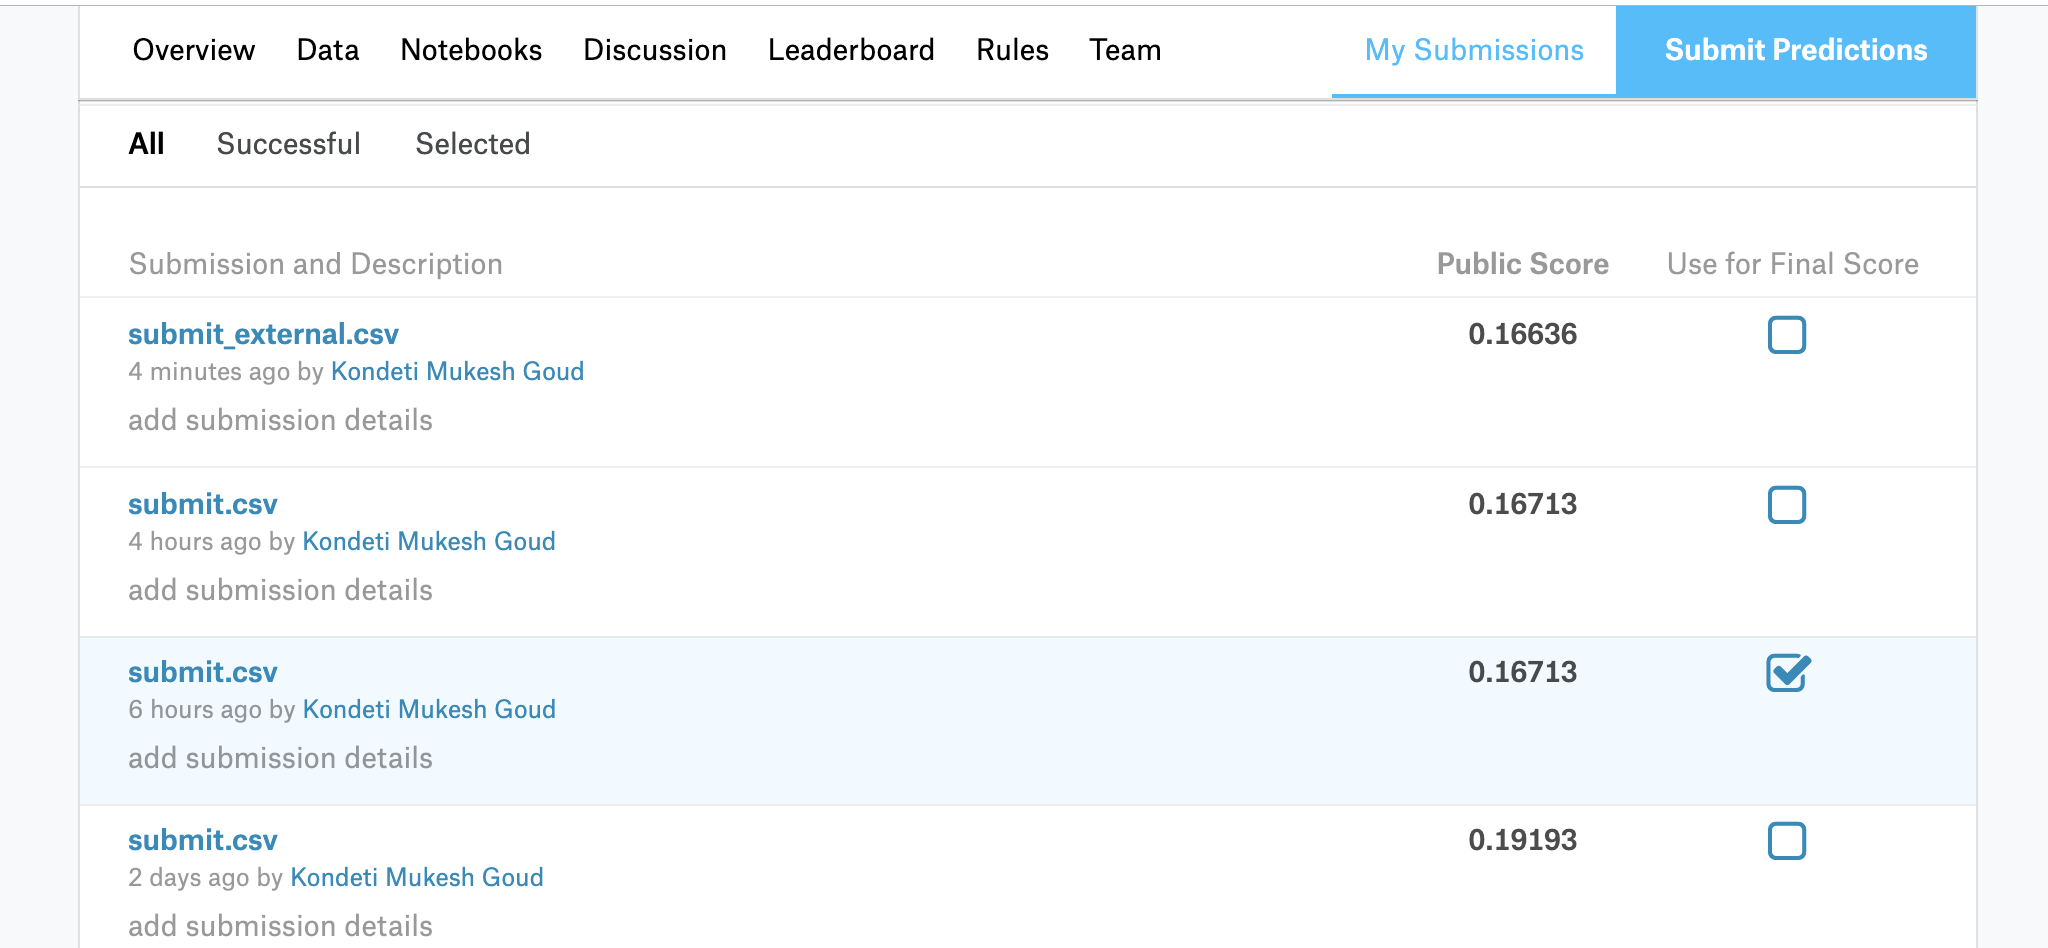